<a href="https://colab.research.google.com/github/GuilhermeVeriss/practice/blob/main/python_learn/failed_coriolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Efeito coriolis - falhou

Aqui temos uma tentativa frustada de simular a força de coriolis indiretamente. Farei uma nova tentativa futuramente, de maneira direta, com as equações de coriolis 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [33]:
t = np.linspace(0, 10, 1000)

def dxdt(t, X):
  x1, x2 = X
  return [x2,
          (np.pi/2) - x1]


def dydt(t, Y):
  y1, y2 = Y
  return [y2,
          np.pi - y1]


X0 = [np.pi*0.3, -np.pi/100]
solX = odeint(dxdt, y0=X0, t=t, tfirst=True)

Y0 = [0, 2*np.pi/(70000)]
solY = odeint(dydt, y0=Y0, t=t, tfirst=True)

In [ ]:
plt.plot(t, solX.T[0])
plt.plot(t, solX.T[1])

In [ ]:
plt.plot(t, solY.T[0])
plt.plot(t, solY.T[1])

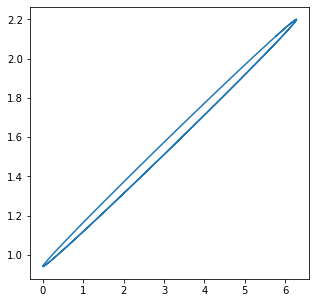

In [42]:
fig1, ax1 = plt.subplots()

ax1.plot(solY.T[0], solX.T[0])
fig1.set_size_inches(5, 5)
plt.show()

In [121]:
a = 6000
g = 9.8/1000
k = g/a


def dAdt(t, A):
  p, p_prime = A
  return [p_prime,
          -k * p]


t0 = np.arange(0, 1000, 0.1)

# latitude e longitude iniciais
lat, lon = np.pi/4, 0.1

# Valores iniciais - derivada de latitude e longitude
dlat = -2* np.pi/4500
dlon = 3* np.pi/ (24*60*60)

# Valor inicial 1
xi = a * np.cos(lat) * np.cos(lon)
dxi = -a * (np.sin(lon)*np.cos(lat)*dlon + np.sin(lat)*np.cos(lon)*dlat)
iv1 = [xi, dxi]
# Equações acopladas 1
s1 = odeint(dAdt, y0 = iv1, t = t0, tfirst=True)

# Valor inicial 2
yi = a * np.cos(lat) * np.sin(lon)
dyi = a * (np.cos(lat)*np.cos(lon)*dlon - np.sin(lon)*np.sin(lat)*dlat)
iv2 = [yi, dyi] 
# Equações acopladas 2
s2 = odeint(dAdt, y0 = iv2, t = t0, tfirst=True)

# Valor inicial 3
zi = a * np.sin(lat)
dzi = a * np.cos(lat) * dlat
iv3 = [zi, dzi]
# Equações acopladas 3
s3 = odeint(dAdt, y0 = iv3, t = t0, tfirst=True)

# Soluções para latitude e longitude:
#lat_sol = np.arcsin(s3.T[0]/a)
#lon_sol = np.arctan(s2.T[0]/s1.T[0])

xt, yt, zt = s1.T[0], s2.T[0], s3.T[0]
vxt, vyt, vzt = s1.T[1], s2.T[1], s3.T[1]


distance = np.sqrt(xt**2 + yt**2 + zt**2)

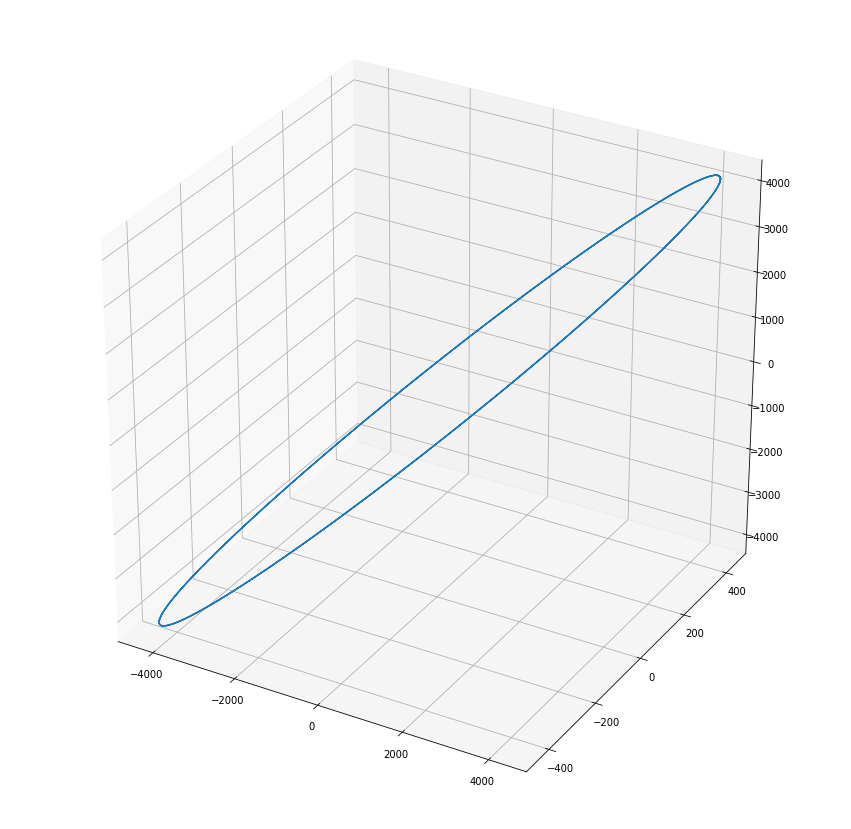

In [122]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xt, yt, zt)


plt.show()

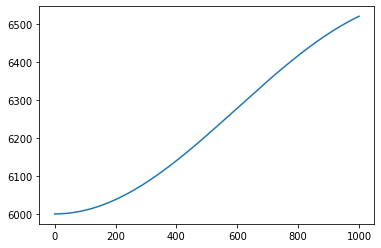

In [118]:
plt.plot(t0, distance)